<img src="https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png" alt="logo_ironhack_blue 7" width="100" height="100">

# Ironhack Mid-Bootcamp Project

## Project Overview

Electric Vehicles (EVs) have been around for a couple decades, but its adoption has really picked up in the last 3 years. In this project we will analyze the increasing demand of EVs and who's leading it, figure out in which stage of adoption we are (according to Everett M. Rogger's [*Diffusion of Innovation Theory*](https://en.wikipedia.org/wiki/Diffusion_of_innovations)) and try to estimate how long will it take for the all car transportation to become electric by finding the EV adoption curve.

According to Rogers, when analyzing the adoption of an innovation, the population penetration follows a **normal distribution** and therefore the market share curve will follow its **cumulative distribution function**.
<div align="center">
<img src="http://steveboese.squarespace.com/storage/adoption_of_tech_no_title.jpg?__SQUARESPACE_CACHEVERSION=1450230149150" alt="Adoption curve examples" width="500">
<img src="https://i0.wp.com/ondigitalmarketing.com/wp-content/uploads/2012/01/640px-Diffusionofideas.png?ssl=1" alt="Adoption curve" width="500">
</div>



## Objective
The objective if this project is to answer the following questions:
+ What is the current stage of Electric Vehicle (EV) adoption? Are we in the phase of Innovators, Early adopters, Early majority, Late majority, or Laggards?
+ Which countries are leading the adoption of EVs? And lagging in the adoption?
+ Which countries are adopting EV's faster (rate of adoption)?
+ What trend (linear, cuadratic, exponential...) is EV adoption currently following?
+ How long will full EV adoption take?

Extra:
+ Which companies are leading the transition from ICE (Internal Combustion Engine) vehicles to EVs?
+ Compare the adoption of electric cars to other vehicles (trucks, vans and buses)

### Finding the EV adoption curve:
+ Assuming our datapoints follow a normal distribution, our sales share data points correspond to x values in the Cumulative Distribution Function:
    + CDF = Φ(x) = 0.5 * [1 + erf((x - μ) / (σ * sqrt(2)))] where μ is the mean, σ is the standard deviation, and erf() is the error function. We want to find μ and σ so that this equation holds for all of our points. This leads to a system of n nonlinear equations.
    + Using scipy's least squares solver we will atempt to solve for μ & σ.
    + Three different scenarios will be estimated: (1) pessimistic, (2) moderate, and (3) optimistic

## Datasets

+ 2010-2022 Global data on EV sales and sales share -> [Global EV Data Explorer](https://www.iea.org/data-and-statistics/data-tools/global-ev-data-explorer)
+ Historical data on company sales and sales share:
    + [Best Selling Cars](https://www.best-selling-cars.com/brands/2021-full-year-global-volkswagen-brand-worldwide-car-sales-by-model-and-country/)
    + [Toyota](https://global.toyota/en/newsroom/corporate/20966057.html)
    + [EV Adoption](https://evadoption.com/ev-sales/evs-percent-of-vehicle-sales-by-brand/)

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

## Load Data

In [88]:
# Global EV Data Explorer API url
api_url = 'https://api.iea.org/evs/?parameter={}&mode=Cars&category=Historical&csv=true'

# Different 'mode' in url for charging points
# https://api.iea.org/evs/?parameter=EV%20charging%20points&mode=EV&category=Historical&csv=true

# API parameters for each dataset
api_parameters = {'ev_sales':'EV%20sales',
                  'ev_sales_share':'EV%20sales%20share',
                  'ev_stock':'EV%20stock',
                  'ev_stock_share':'EV%20stock%20share',
                  'electricity_demand':'Electricity%20demand'}

# Load sales and sales share data
ev_sales_df = pd.read_csv(api_url.format(api_parameters['ev_sales']))
ev_sales_share_df = pd.read_csv(api_url.format(api_parameters['ev_sales_share']))

# Show last 5 rows
ev_sales_df
#['region'].value_counts()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49
1,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170
2,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80
3,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100
4,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190
...,...,...,...,...,...,...,...,...
829,World,Historical,EV sales,Cars,PHEV,2020,Vehicles,970000
830,World,Historical,EV sales,Cars,PHEV,2021,Vehicles,1900000
831,World,Historical,EV sales,Cars,BEV,2021,Vehicles,4600000
832,World,Historical,EV sales,Cars,BEV,2022,Vehicles,7300000


In [105]:
# Filter data for World region only
ev_world_sales_df = ev_sales_df[(ev_sales_df['region'] == 'World') & (ev_sales_df['powertrain'] == 'BEV')]
ev_world_sales_share_df = ev_sales_share_df[ev_sales_share_df['region'] == 'World']

,region,category,parameter,mode,powertrain,year,unit,value
808,World,Historical,EV sales,Cars,BEV,2010,Vehicles,7200
811,World,Historical,EV sales,Cars,BEV,2011,Vehicles,39000
812,World,Historical,EV sales,Cars,BEV,2012,Vehicles,58000
815,World,Historical,EV sales,Cars,BEV,2013,Vehicles,110000
816,World,Historical,EV sales,Cars,BEV,2014,Vehicles,200000


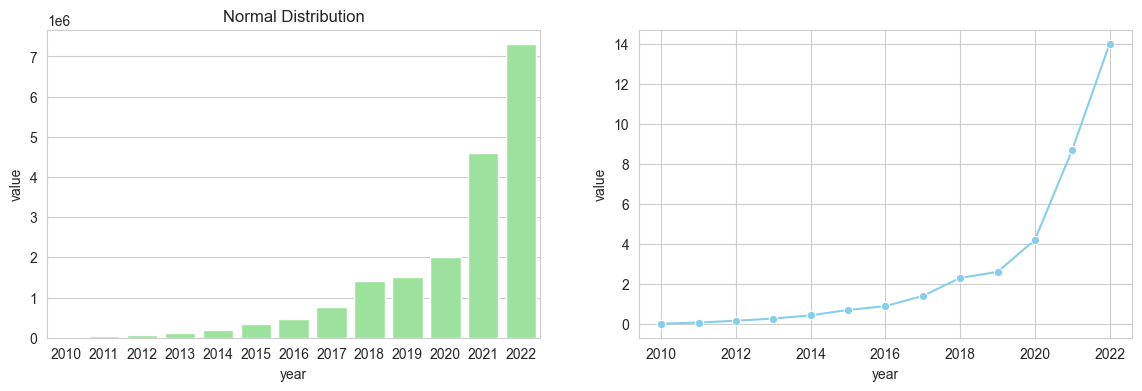

In [109]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Plot the line plot with seaborn
sns.lineplot(data=ev_world_sales_share_df, x='year', y='value', marker='o', color='skyblue', ax=axes[1])

sns.barplot(data=ev_world_sales_df, x='year', y='value', color='lightgreen', ax=axes[0])

axes[0].set_title('Normal Distribution')

# Set plot title and labels
ax[1].set_title('Line Plot')
ax[1].set_xlabel('year')
ax[1].set_ylabel('market share')

# Show the plot
display(ev_world_sales_df.head())
plt.show()

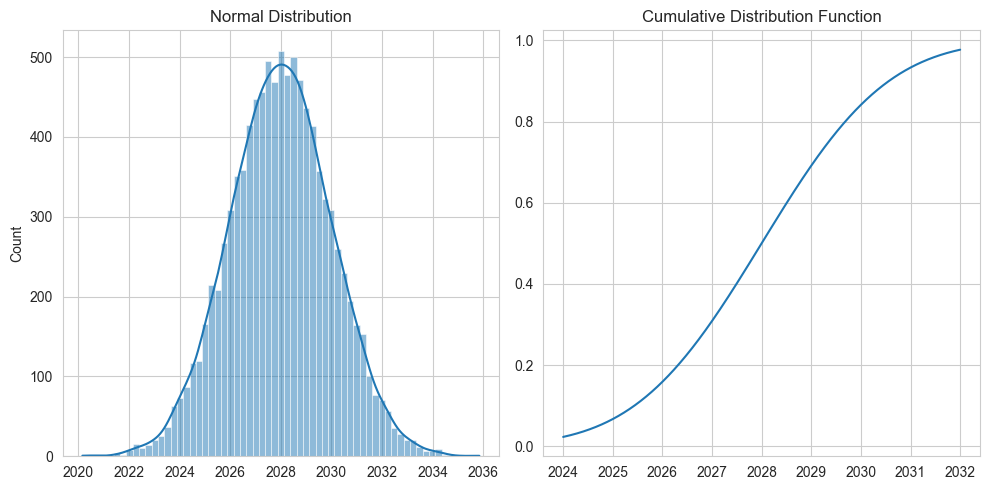

In [59]:
# Generate random data from a normal distribution
mu = 2028  # Mean
sigma = 2  # Standard deviation
n = 10000
np.random.seed(42)  # Set the random seed for reproducibility
data = np.random.normal(mu, sigma, n)

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.set_style("whitegrid")

# Plot the histogram of the random data
sns.histplot(data, kde=True, ax=axes[0])
axes[0].set_title('Normal Distribution')

# Plot the CDF of the normal distribution
x = np.linspace(mu - 2 * sigma, mu + 2 * sigma, 1000)  # Range of x values
cdf = norm.cdf(x, mu, sigma)  # Calculate the CDF
sns.lineplot(x=x, y=cdf, ax=axes[1])  # Pass x-axis values as x argument
axes[1].set_title('Cumulative Distribution Function')

# Display the plot
plt.tight_layout()
plt.show()


This project we will analyze the increasing demand of EVs and who's leading it, figure out in which stage of adoption we are and try to estimate how long will it take for the all car transportation to become electric by finding the EV adoption curve.